In [1]:
import pandas

In [3]:
dataset=pandas.read_csv('./Dataset/Salary_Data.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=dataset["YearsExperience"]
y=dataset["Salary"]
X.shape

(30,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
X_train.shape

(24,)

In [7]:
X_train

28    10.3
24     8.7
12     4.0
0      1.1
4      2.2
16     5.1
5      2.9
13     4.1
11     4.0
22     7.9
1      1.3
2      1.5
25     9.0
3      2.0
21     7.1
26     9.5
18     5.9
29    10.5
20     6.8
7      3.2
10     3.9
14     4.5
19     6.0
6      3.0
Name: YearsExperience, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[10.3  8.7  4.   1.1  2.2  5.1  2.9  4.1  4.   7.9  1.3  1.5  9.   2.
  7.1  9.5  5.9 10.5  6.8  3.2  3.9  4.5  6.   3. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
type(X_train)

pandas.core.series.Series

In [12]:
#converting pandas to numpy
X_train=X_train.values
y_train=y_train.values

In [13]:
type(X_train)

numpy.ndarray

In [14]:
X_train

array([10.3,  8.7,  4. ,  1.1,  2.2,  5.1,  2.9,  4.1,  4. ,  7.9,  1.3,
        1.5,  9. ,  2. ,  7.1,  9.5,  5.9, 10.5,  6.8,  3.2,  3.9,  4.5,
        6. ,  3. ])

# coverting 1D to 2D

In [15]:
# -1 takes total row or if u know the total row then put that no.
# we know we have 24 row so X_train_test2=X_train.reshape(24,1) is same as below 
X_train_final=X_train.reshape(-1,1)

In [17]:
#just testing the above
X_train_test2=X_train.reshape(24,1)

In [18]:
y_train_final=y_train.reshape(-1,1)

In [19]:
#training model
model.fit(X_train_final,y_train_final)

LinearRegression()

In [46]:
y_test_predicted=model.predict(X_test_final)

In [48]:
model.coef_

array([[9423.81532303]])

In [49]:
model.intercept_

array([25321.58301178])

In [21]:
X_test

27    9.6
15    4.9
23    8.2
17    5.3
8     3.2
9     3.7
Name: YearsExperience, dtype: float64

In [22]:
X_test=X_test.values
X_test_final=X_test.reshape(-1,1)
y_test=y_test.values
y_test_final=y_test.reshape(-1,1)

In [23]:
X_test_final

array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2],
       [3.7]])

In [25]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [26]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Salary')

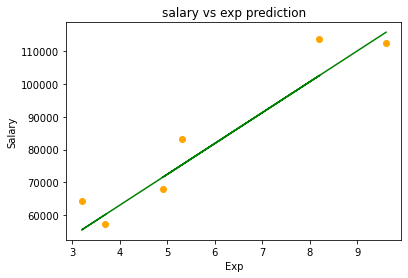

In [28]:
plt.scatter(X_test_final,y_test_final, color='orange')
plt.plot(X_test_final,y_test_predicted, color= 'green')
plt.title('salary vs exp prediction')
plt.xlabel('Exp')
plt.ylabel('Salary')

In [29]:
y_test_predicted

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

Text(0, 0.5, 'Salary')

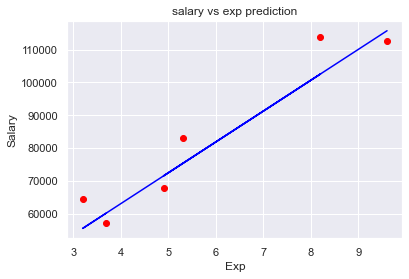

In [31]:
import seaborn as sns
sns.set()
plt.scatter(X_test_final,y_test_final, color='red')
plt.plot(X_test_final,y_test_predicted, color= 'blue')
plt.title('salary vs exp prediction')
plt.xlabel('Exp')
plt.ylabel('Salary')

In [33]:
from joblib import dump

In [34]:
dump(model,'salaryPredictedModel.h5')
dump(model,'salaryPredictedModel.pk1')

['salaryPredictedModel.pk1']

In [39]:
from joblib import load

Checking that both extension works? Ans:any extension work

In [36]:
modelFromSaved1=load('salaryPredictedModel.h5')

In [37]:
modelFromSaved1.predict(X_test_final)

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [38]:
y_test_predicted

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [40]:
modelFromSaved2=load('salaryPredictedModel.pk1')

In [41]:
modelFromSaved2.predict(X_test_final)

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [42]:
dump(model,'salaryPredictedModel.mp')

['salaryPredictedModel.mp']

In [43]:
modelFromSaved3=load('salaryPredictedModel.mp')

In [45]:
modelFromSaved3.predict(X_test_final)

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])